# HR Analytics: Employee Attrition

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
# Load Data
df = pd.read_csv('attrition_data.csv')

# Convert outcome to binary
df['Attrition'] = np.where(df['Attrition']=='Yes', 1, 0)

In [3]:
df.head()

,Attrition,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,...,Yes,11,3,1,8,1,6,4,0,5
1,0,49,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,...,No,23,4,4,10,3,10,7,1,7
2,1,37,Travel_Rarely,Research & Development,2,2,Other,4,Male,2,...,Yes,15,3,2,7,3,0,0,0,0
3,0,33,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,3,...,Yes,11,3,3,8,3,8,7,3,0
4,0,27,Travel_Rarely,Research & Development,2,1,Medical,1,Male,3,...,No,12,3,4,6,3,2,2,2,2


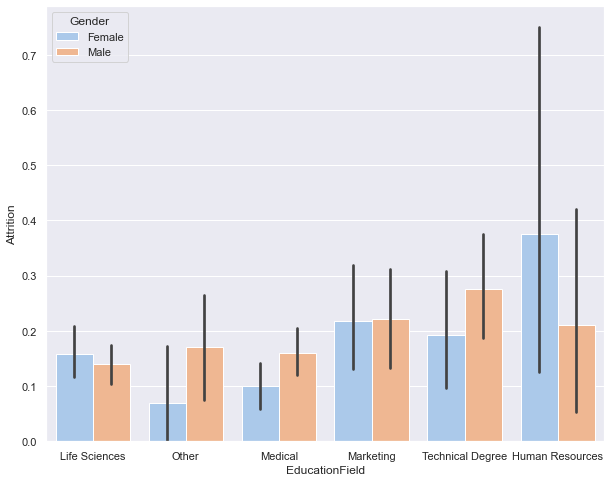

In [5]:
# Gender and Education
sns.set(rc={'figure.figsize':(10,8)})
sns.barplot(x='EducationField', y='Attrition', data=df, hue='Gender', palette='pastel')
plt.show()

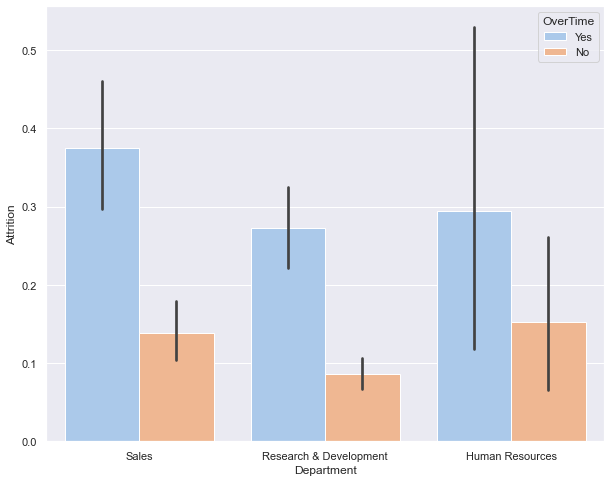

In [6]:
# Department and Overtime
sns.set(rc={'figure.figsize':(10,8)})
sns.barplot(x='Department', y='Attrition', data=df, hue='OverTime', palette='pastel')
plt.show()

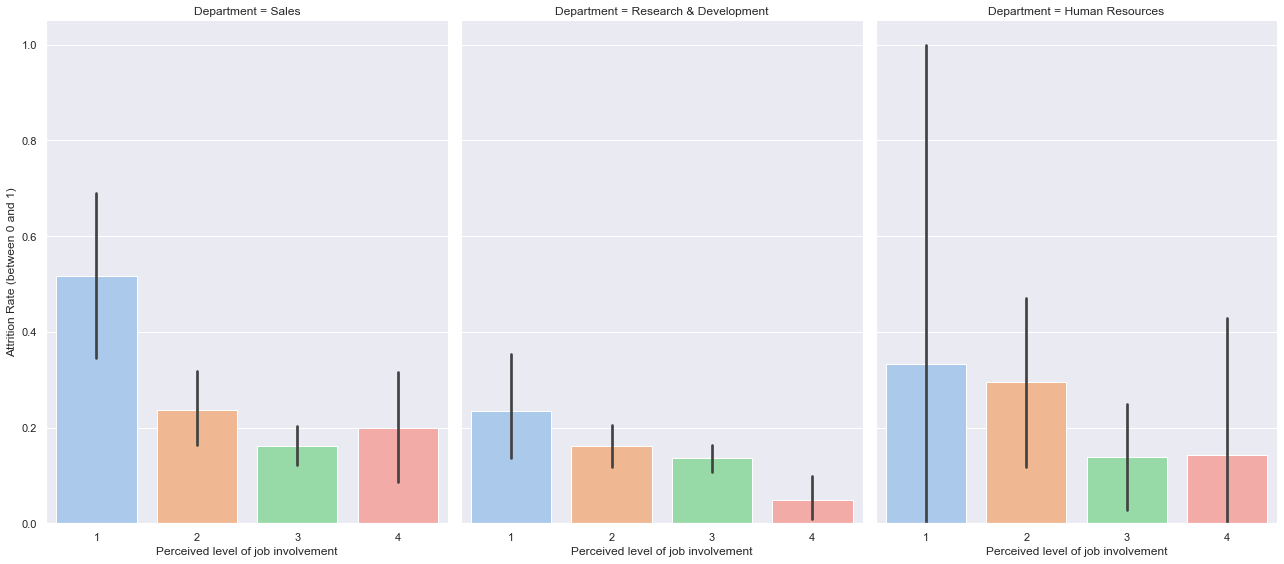

In [7]:
# Environment and Job Involvement
s = sns.FacetGrid(df, col="Department", height=8, aspect=.75)
s.map(sns.barplot, 'JobInvolvement', 'Attrition', palette='pastel', order=[1,2,3,4])
s.set_axis_labels("Perceived level of job involvement", "Attrition Rate (between 0 and 1)")
plt.show()

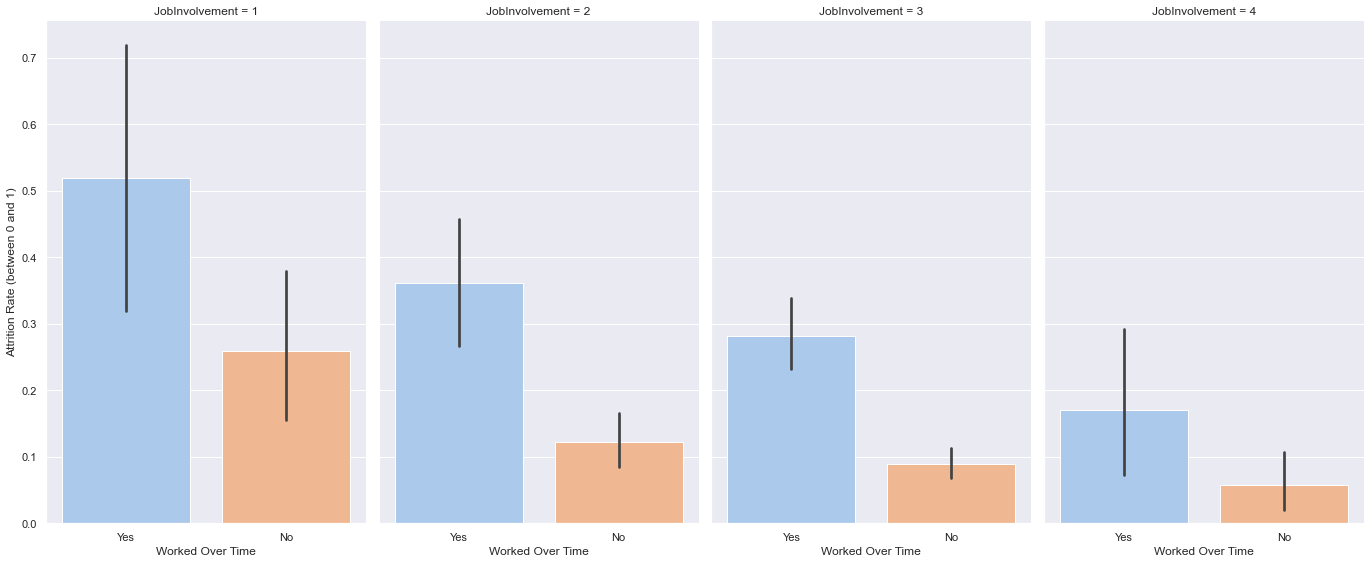

In [8]:
# Overtime and Job Involvement
s = sns.FacetGrid(df, col="JobInvolvement", height=8, aspect=.6)
s.map(sns.barplot, 'OverTime', 'Attrition', palette='pastel', order=["Yes", "No"])
s.set_axis_labels("Worked Over Time", "Attrition Rate (between 0 and 1)")
plt.show()

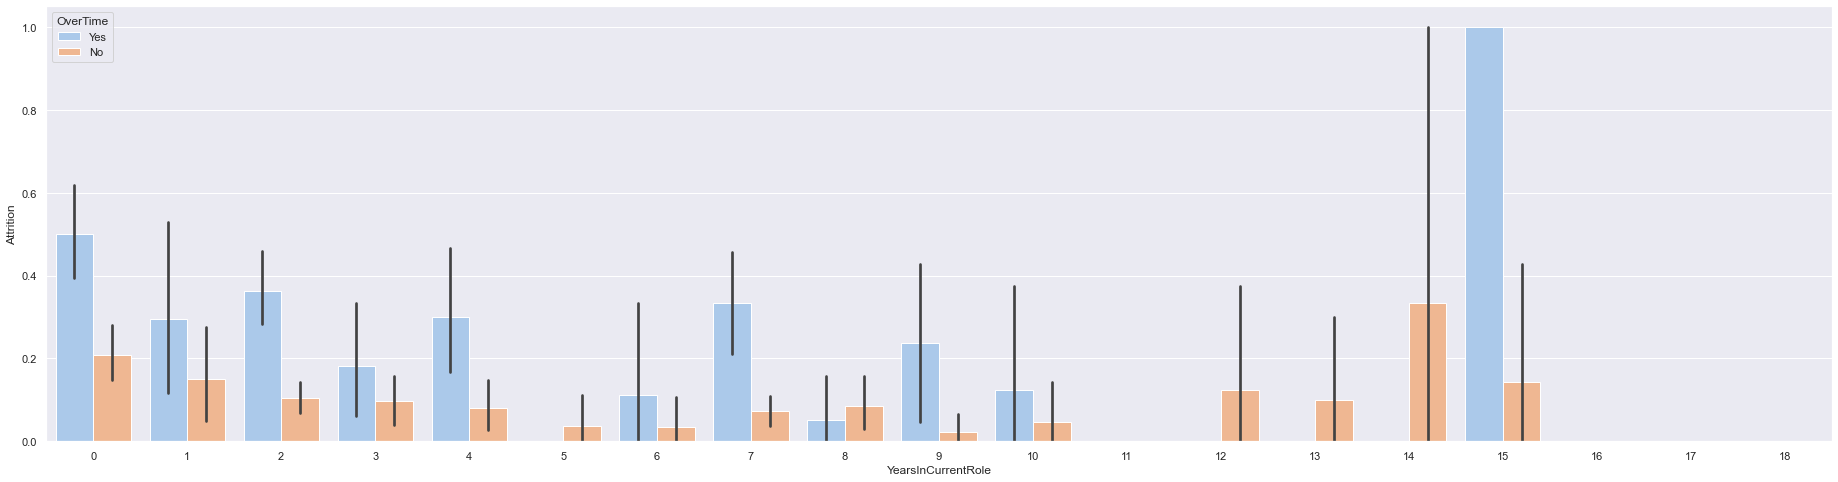

In [9]:
# Years in current role
sns.set(rc={'figure.figsize':(32,8)})
sns.barplot(x='YearsInCurrentRole', y='Attrition', data=df, hue='OverTime', palette='pastel')
plt.show()

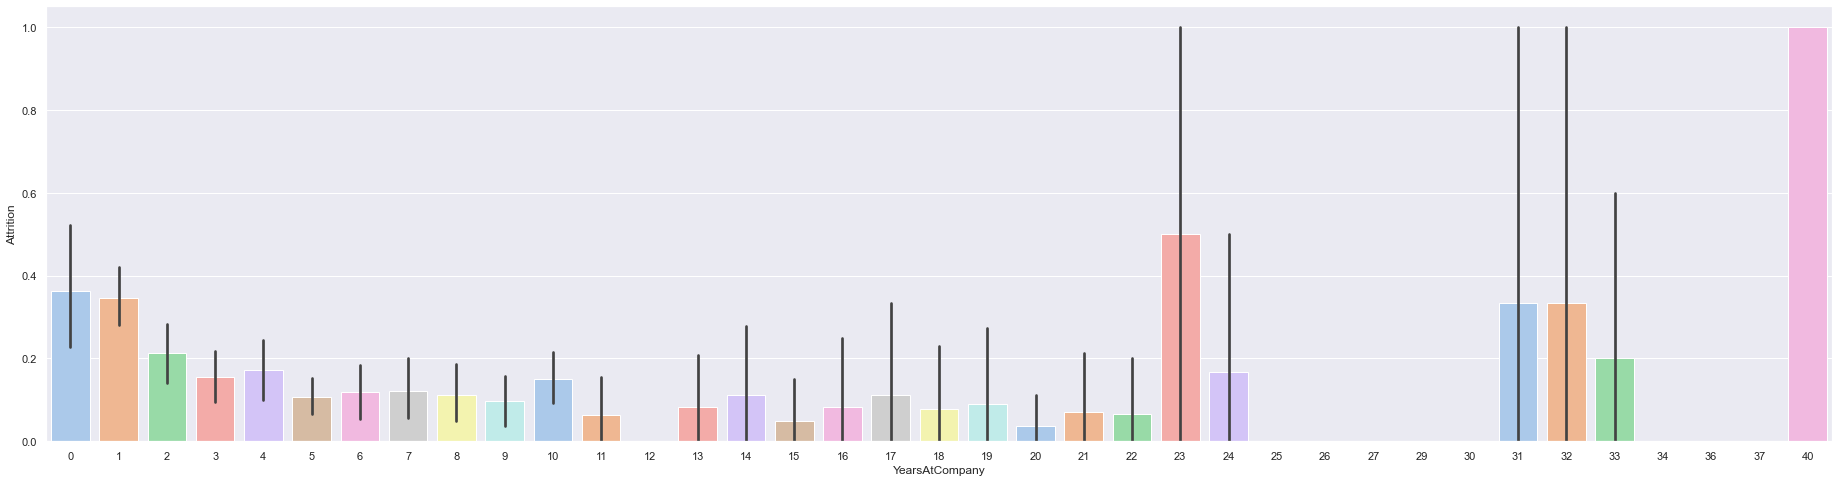

In [10]:
# Years at the same company
sns.set(rc={'figure.figsize':(32,8)})
sns.barplot(x='YearsAtCompany', y='Attrition', data=df, palette='pastel')
plt.show()

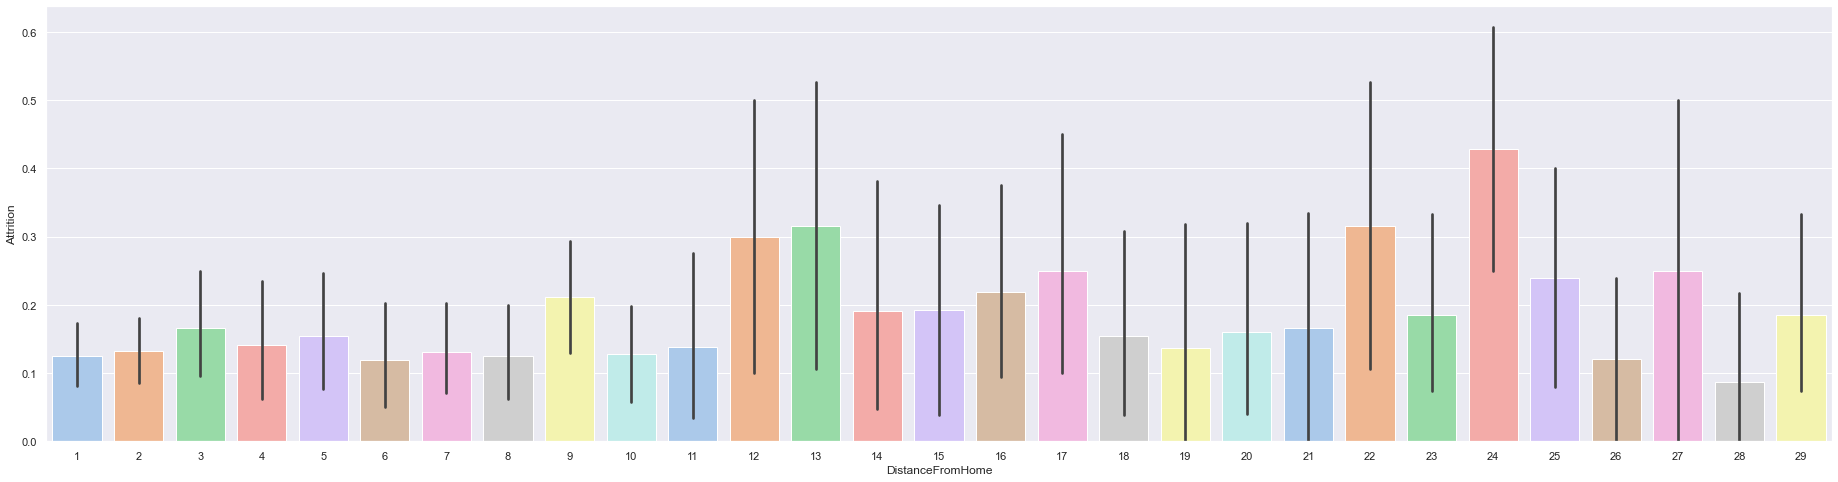

In [11]:
# Distance From Home
sns.set(rc={'figure.figsize':(32,8)})
sns.barplot(x='DistanceFromHome', y='Attrition', data=df, palette='pastel')
plt.show()

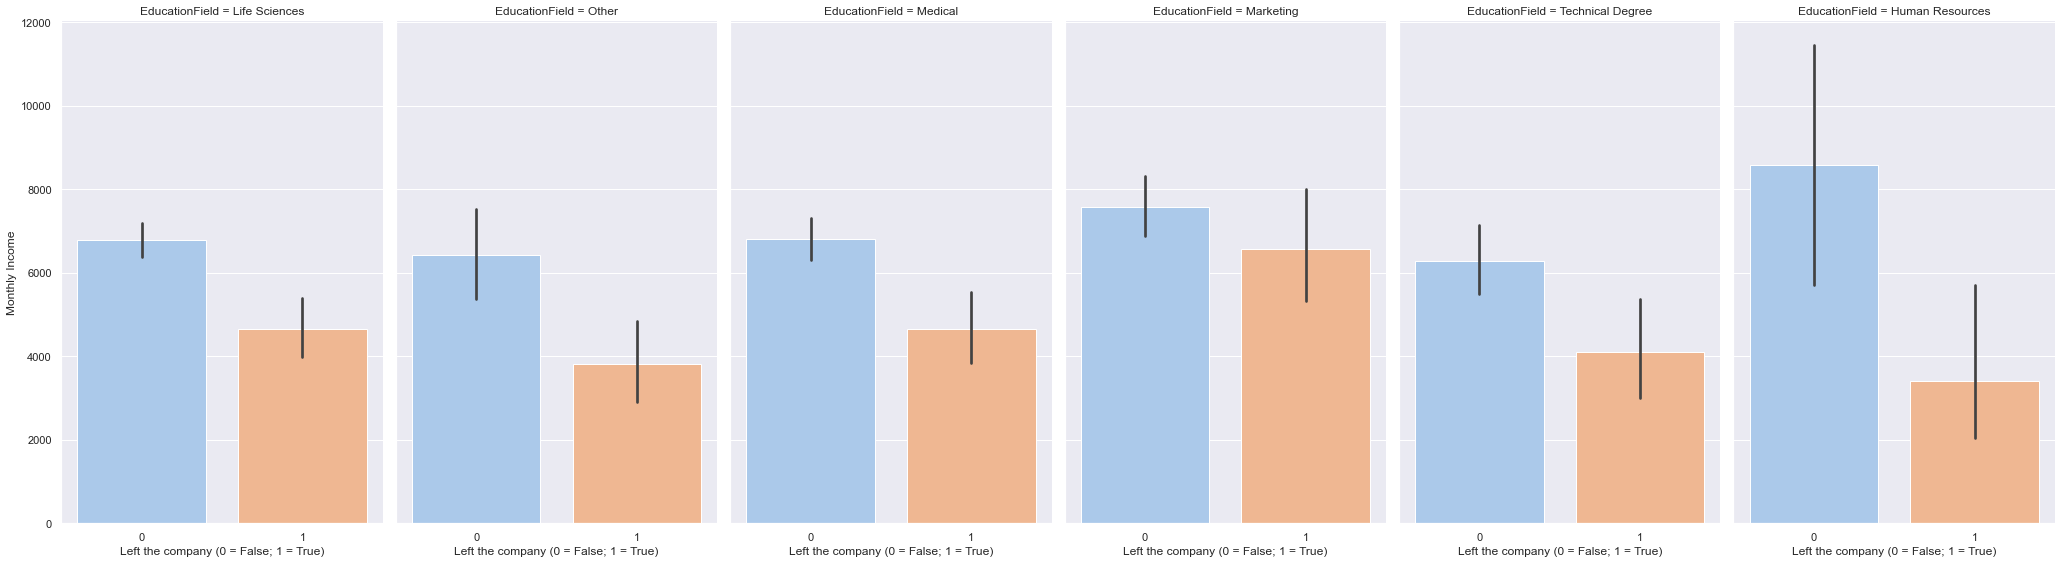

In [12]:
# Education, Attrition and Monthly Income
s = sns.FacetGrid(df, col="EducationField", height=8, aspect=.6)
s.map(sns.barplot, 'Attrition', 'MonthlyIncome', palette='pastel', order=[0, 1])
s.set_axis_labels("Left the company (0 = False; 1 = True)", "Monthly Income")
plt.show()

### Conclusion

The turnover of employees seems to be driven by three main factors - monthly income, perceived level of job involvement and working over time. On average, employees that left the company 
earned markedly lower wages than those who chose to remain. Similarly, the attrition rate was highest among employees who were the most dissatisfied with the level of involvement in their
job. Therefore, if employees feel left out or insufficiently engaged, then their incentive to leave is heightened. Lastly, another key differentiator is the possibility of working over time. 
Specifically, employees who did work over time demonstrated a significantly higher likelihood of leaving the company. Taken together with the other two factors discussed above, it appears that
the risk of burnout and discontentment is much more pronounced when the employees have to work beyond their regular remit. All of the above problems were most visible within the Sales and Human
Resources departments.

In [43]:
# Training a Classifier to Predict Attrition

# Load Data
x = df.drop(columns='Attrition')
y = df['Attrition']

# Label Encoder
le = LabelEncoder()

# Scaler
scal = StandardScaler()

# Convert string variables into categorical features
for feat in x.columns:
    if x[feat].dtype == 'object':
        x[feat] = le.fit_transform(x[feat])
    elif x[feat].dtype == 'int64':
        x[feat] = scal.fit_transform(np.array(x[feat]).reshape(-1,1))

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=123)

In [44]:
# Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X=x_train, y=y_train)

# Retrieve predicted values
y_pred = logreg.predict(x_test)

# Compute accuracy
acc = metrics.accuracy_score(y_test, y_pred)

# Conclusion
print(f"The logistic regression classifier has an accuracy of {acc*100:.2f}%")

The logistic regression classifier has an accuracy of 90.82%
